# Alignment
This notebook looks at the differences between a train and test set, specifically the NC17_EvalPart1 (train) and MFC18_EvalPart1 (test) datasets. We can adapt the training set to better "align" with the test in several ways:
1. Feature Removal  
2. Relabeling  
3. Data Removal  
4. Reweighting  

In [2]:
import os
import sys
sys.path.insert(0, os.getcwd() + '/../')  # for scripts
sys.path.insert(0, os.getcwd() + '/../../')  # for util

from scripts.alignment import remove_feature, reweight, remove_data, relabel
from scripts.explanation import example
data_dir = '../../data'

## Feature Removal
This section looks at the possibility of efficiently detecting which features to remove from training as to increase test set performance using various methods. Specifically, using SHAP values and sample-based explanations in combination with SHAP values.

model (LGBMClassifier)
train set acc: 1.000000
missed train instances (0)
train log loss: 0.02060
train auroc: 1.000
test set acc: 0.817634
missed test instances (3177)
test log loss: 0.58381
test auroc: 0.711


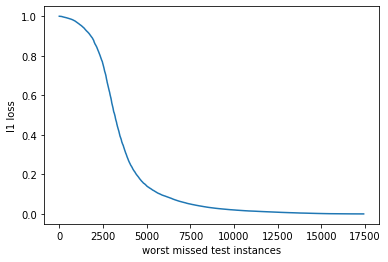

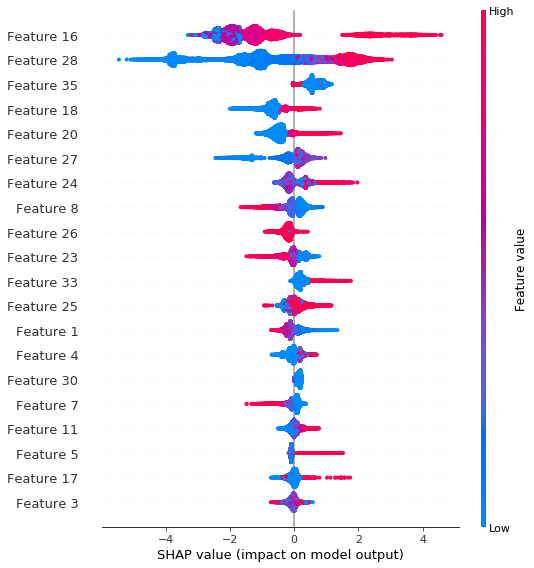

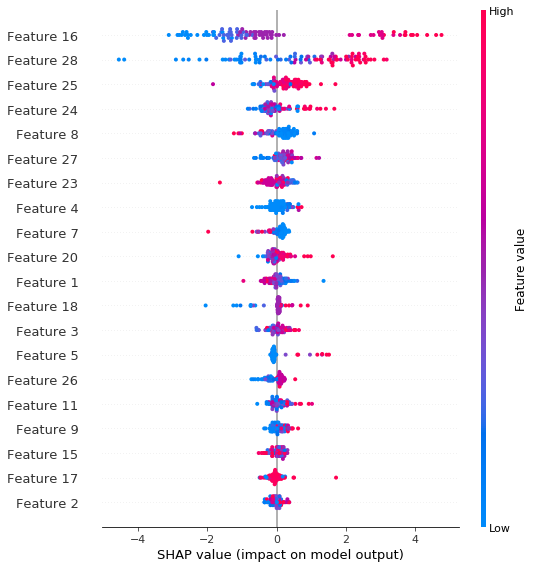

100%|██████████| 8/8 [00:03<00:00,  2.24it/s]


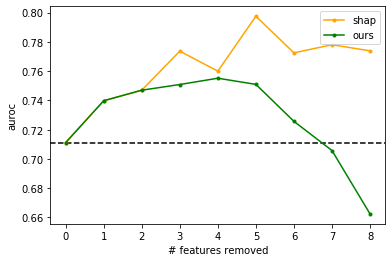

In [3]:
remove_feature(model='lgb', encoding='tree_path', dataset='medifor', n_estimators=100, random_state=1,
               data_dir=data_dir, plot=True, test_subset=20000, n_remove=8)

## Relabeling
This section computes the overall impact of train instances on the test set, and relabels the most positively impactful train instances. The idea is that these instances are responsibly the domain mismatch.

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.02060
train auroc: 1.000
test set acc: 0.817634
test log loss: 0.58381
test auroc: 0.711


100%|██████████| 50/50 [00:27<00:00,  1.86it/s]


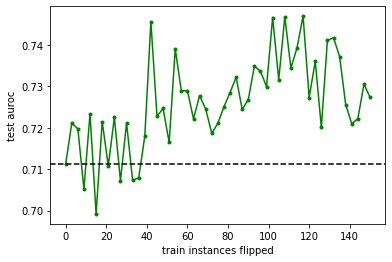

In [4]:
relabel(model='lgb', dataset='nc17_mfc18', encoding='leaf_output', random_state=1, iterations=1, n_points=50, data_dir=data_dir)

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.02060
train auroc: 1.000
test set acc: 0.817634
test log loss: 0.58381
test auroc: 0.711


100%|██████████| 5/5 [00:55<00:00, 11.52s/it]


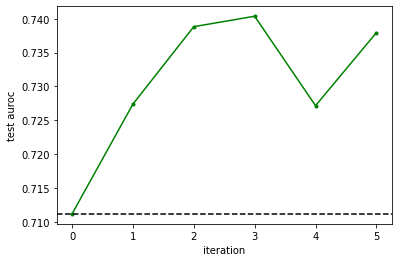

In [6]:
relabel(model='lgb', dataset='nc17_mfc18', encoding='leaf_output', random_state=1, iterations=5, data_dir=data_dir)

## Data Removal
This section computes the overall impact of the train instances on the test set, and removes the most impactful train instances. The idea is that these instances are most responsible for the incorrect predictions in the test set, so removing them may actually improve performance.

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.02060
train auroc: 1.000
test set acc: 0.817634
test log loss: 0.58381
test auroc: 0.711


100%|██████████| 3/3 [00:01<00:00,  2.05it/s]


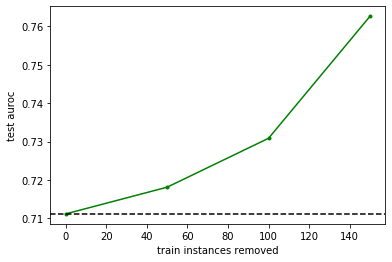

In [4]:
remove_data(model='lgb', dataset='nc17_mfc18', encoding='leaf_output', random_state=1, iterations=1, n_points=3, data_dir=data_dir)

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.02060
train auroc: 1.000
test set acc: 0.817634
test log loss: 0.58381
test auroc: 0.711


100%|██████████| 150/150 [01:19<00:00,  1.85it/s]


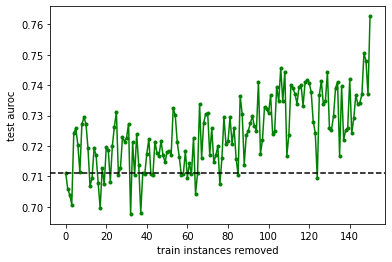

In [5]:
remove_data(model='lgb', dataset='nc17_mfc18', encoding='leaf_output', random_state=1, iterations=1, n_points=150, data_dir=data_dir)

## Reweight
This section computes the overall impact of the train instances on the test instances. It then upweights negatively impactful train instances and downweights positively impactful train instances.

## Explanation
This section generates an explanation for a single test instance, and uses SHAP to view the most important features for the test instance, as well as each train instance.

In [5]:
example(model='lgb', dataset='nc17_mfc18', encoding='leaf_output', topk_train=5, topk_test=2, random_state=1, data_dir=data_dir)

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.02060
train auroc: 1.000
test set acc: 0.817634
test log loss: 0.58381
test auroc: 0.711

Tree Explainer:
train shape: (3774, 36)
classes: [0 1]
encoding: leaf_output
sparse: False
kernel: rbf
fit predicted labels: True
C: 0.1
gamma: scale
random state: 1

[-2.04724748]
-2.047247478200784 0


Test [8766], distance to separator: -2.047, prediction: non-manipulated, actual: manipulated

Support Vectors: 299
Nonzero Support Vectors: 299
intercept: -0.128

Most Impactful Train Instances
Train [490], impact: 0.045, similarity: 0.445, weight: 0.10000, label: non-manipulated
Train [3061], impact: 0.043, similarity: 0.426, weight: 0.10000, label: non-manipulated
Train [185], impact: 0.042, similarity: 0.425, weight: 0.10000, label: non-manipulated
Train [1975], impact: 0.042, similarity: 0.416, weight: 0.10000, label: non-manipulated
Train [3466], impact: 0.041, similarity: 0.414, weight: 0.10000, label: non-manipulated


490


3061


185


1975


3466


[-2.04736666]
-2.0473666592334787 0


Test [1693], distance to separator: -2.047, prediction: non-manipulated, actual: manipulated

Support Vectors: 299
Nonzero Support Vectors: 299
intercept: -0.128

Most Impactful Train Instances
Train [490], impact: 0.045, similarity: 0.447, weight: 0.10000, label: non-manipulated
Train [185], impact: 0.043, similarity: 0.429, weight: 0.10000, label: non-manipulated
Train [3061], impact: 0.043, similarity: 0.427, weight: 0.10000, label: non-manipulated
Train [3466], impact: 0.042, similarity: 0.416, weight: 0.10000, label: non-manipulated
Train [1975], impact: 0.041, similarity: 0.414, weight: 0.10000, label: non-manipulated


490


185


3061


3466


1975
